In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

## 数据准备

In [3]:
from sklearn import datasets

In [4]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2)
X.shape, y.shape

((100, 2), (100,))

In [5]:
df = pd.DataFrame(np.hstack([X, y.reshape(-1,1)]), columns=["x1", "x2", "y"])
df.sample(5)

,x1,x2,y
24,4.575792,-8.791898,0.0
16,-7.651202,3.028637,1.0
34,-9.034419,2.228160,1.0
62,-7.526906,2.806898,1.0
93,-8.041991,2.158956,1.0


Text(0, 0.5, 'x2')

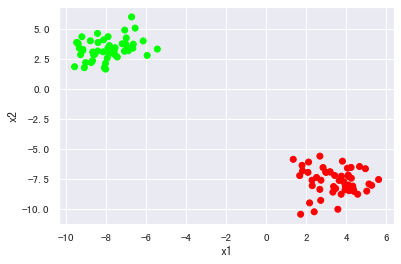

In [6]:
plt.scatter(X[:,0], X[:,1], c=np.where(y==0, "#ff0000", "#00ff00") )
plt.xlabel("x1")
plt.ylabel("x2")

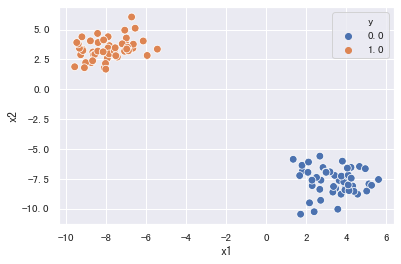

In [7]:
sns.scatterplot(x="x1", y="x2", hue="y", data=df, s=60)

## Sigmoid函数

就是逻辑回归的概率函数。

![](assets/logistic_regression_sigmoid.png)

In [8]:
def my_sigmoid(x):
    # np.e**x, np.power(np.e, x), np.exp(x)
    y = 1 / (1 + np.exp(-x))
    return y

# 正负号变了一下
def my_sigmoid_negative(x):
    # np.e**x, np.power(np.e, x), np.exp(x)
    y = 1 / (1 + np.exp(x))
    return y

In [9]:
np.e

2.718281828459045

In [10]:
np.exp(3) , np.e**3 , np.power(np.e, 3)

(20.085536923187668, 20.085536923187664, 20.085536923187664)

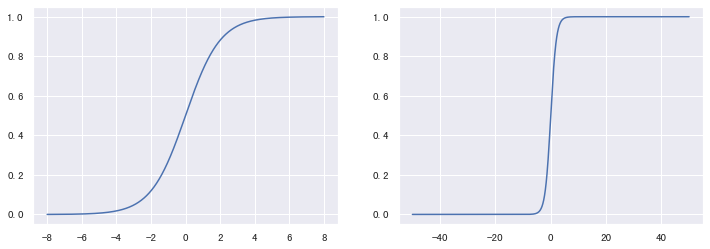

In [11]:
fig,axs = plt.subplots(1, 2, figsize=(12,4))

x = np.linspace(-8, 8, 1000)
axs[0].plot(x, my_sigmoid(x))

x = np.linspace(-50, 50, 1000)
axs[1].plot(x, my_sigmoid(x))

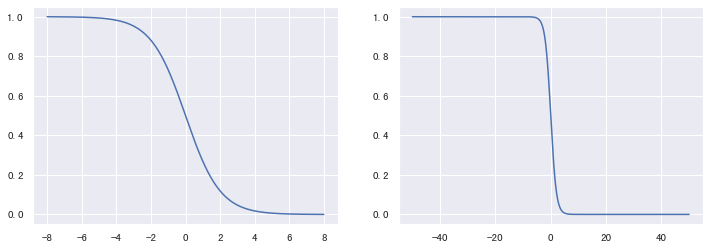

In [12]:
fig,axs = plt.subplots(1, 2, figsize=(12,4))

x = np.linspace(-8, 8, 1000)
axs[0].plot(x, my_sigmoid_negative(x))

x = np.linspace(-50, 50, 1000)
axs[1].plot(x, my_sigmoid_negative(x))

## 手写LogisticRegression

### 逻辑回归模型的代价函数

使用最大似然推导出来的，和交叉熵的公式竟然是一样的。

![](assets/logistic_regression_cost.png)

In [13]:
# 损失函数，在这里也是交叉熵
def cross_entropy(y, y_predict):
    # y值支取0和1，就是把一个公式合成一个了，y_predict就是预测为1的概率，1-y_predict就是预测为0的概率
    return - ( y * np.log(y_predict) + (1 - y)*np.log(1 - y_predict) ).mean()

In [14]:
np.log(np.e)

1.0

## 损失函数的求导

求出来的结果形式竟然和线性回归的一样，只是符合函数的表现形式不同罢了。

对单个数据的求导：
![](assets/logistic_regression_cost_gradient1.png)
![](assets/logistic_regression_cost_gradient2.png)

这个是负导数(梯度)方向:
![](assets/logistic_regression_cost_gradient3.png)

对个数据集的求导：
![](assets/logistic_regression_cost_gradient4.png)

这个也是负导数(梯度)方向:
![](assets/logistic_regression_cost_gradient5.png)
![](assets/logistic_regression_cost_gradient6.png)

In [15]:
def get_gradient(x, theta, y):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    y_ = sigmoid(np.dot(x, theta))
    #这样麻烦(y_ - y) * x
    return np.dot(x.T, y_ - y) / x.shape[0]

## 手写LogisticRegression

In [16]:
def get_gradient(x, theta, y):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    y_ = sigmoid(np.dot(x, theta))
    #这样麻烦(y_ - y) * x
    return np.dot(x.T, y_ - y) / x.shape[0]

In [17]:
# 损失函数和cross_entropy一样，多了预测值的计算
def cost_func(x,y,theta):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    y_predict = sigmoid(np.dot(x, theta))
    # y值支取0和1，就是把一个公式合成一个了，y_predict就是预测为1的概率，1-y_predict就是预测为0的概率
    return - ( y * np.log(y_predict) + (1 - y)*np.log(1 - y_predict) ).mean()

In [18]:
theta = np.full(X.shape[1], 1)
alpha = 0.01 # 步长
num_iters = 0
max_iters = 100000
c = 0.0001 #两次结果小于这个值就停止迭代
preCost = 0
while(True):    
    gradient = get_gradient(X, theta, y)
    theta = theta - gradient * alpha        
    cost = cost_func(X,y,theta)    
    if(num_iters != 0 and (preCost - cost < c or num_iters > max_iters) ):
        break
    if(num_iters % 1000 == 0):       
        print(cost)
    preCost = cost
    num_iters += 1
print("num_iters:%d" % num_iters) 
print("cost:%0.4f" % cost)

2.14553056116166
num_iters:144
cost:0.0118


In [19]:
theta

array([0.02517459, 1.35553632])

Text(0, 0.5, 'x2')

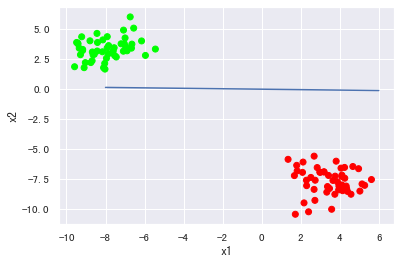

In [20]:
# 把截距忘了
# a*x1 + b*x2 = 0
# x2 = -1/b * (a*x1)
plt.scatter(X[:,0], X[:,1], c=np.where(y==0, "#ff0000", "#00ff00") )

x = np.linspace(-8, 6, 1000)
plt.plot(x, -theta[0]/theta[1]*x)

plt.xlabel("x1")
plt.ylabel("x2")

In [21]:
# 准确率：这条线完全分开了，肯定百分之百啊
np.mean( (my_sigmoid(np.dot(X, theta)) > 0.5) == y )

1.0

In [22]:
y_predict = np.where(my_sigmoid(np.dot(X, theta)) > 0.5, 1, 0)
(y_predict == y).mean()

1.0

In [23]:
prob = my_sigmoid(np.dot(X, theta))
# 1、0样本被预测的为1的平均概率
prob[y==1].mean(), prob[y==0].mean()

(0.977178718743682, 7.57947719820259e-05)

In [24]:
pd.DataFrame({"概率":my_sigmoid(np.dot(X, theta)), "真实值":y}).sample(8)

,概率,真实值
82,0.992629,1
2,0.975922,1
46,0.996862,1
13,0.984210,1
78,0.989178,1
43,0.000003,0
73,0.000086,0
38,0.000019,0


In [25]:
class MyLogisticRegression():
    def __init(self):
        self.intercept_ = 0
        self.coef_ = []
        
    def fit(self, X, y, fit_intercept=True, alpha = 0.001, c = 0.0001, max_iters = 100000,
           debug_cost=True):
        if fit_intercept:
            # 和这个是一样的：np.hstack([np.ones((X.shape[0],1)), X])
            X = np.c_[np.ones((X.shape[0],1)), X]
            theta = np.full(X.shape[1], 1)
        else:
            X = X.copy()
            theta = np.full(X.shape[1], 1)
                
        num_iters = 0
        preCost = 0
        #print(self.cost_func(X,y,theta))
        while(True):    
            gradient = self.get_gradient(X, theta, y)
            theta = theta - gradient * alpha        
            cost = self.cost_func(X,y,theta)    
            # 必须求绝对值，不然就坑了
            if(num_iters != 0 and (np.abs(preCost - cost) < c or num_iters > max_iters) ):
                break          
            if debug_cost and num_iters % 10000 == 0:       
                print(cost)
            preCost = cost
            num_iters += 1
        if debug_cost:
            print("num_iters:%d" % num_iters) 
        print("cost:%0.4f" % cost)
        
        if fit_intercept:
            self.intercept_ = theta[0]
            self.coef_ = theta[1:]
        else:
            self.intercept_ = 0
            self.coef_ = theta[:]
        
    def predict(self, X_train):
        prob = self.sigmoid(np.dot(X_train, self.coef_) + self.intercept_)
        return np.where(prob > 0.5, 1, 0)
    
    def predict_prod(self, X_train):
        prob = self.sigmoid(np.dot(X_train, self.coef_) + self.intercept_)
        return prob
    
    def score(self, X_train, y):
        return np.mean( self.predict(X_train) == y )
    
    def get_gradient(self, x, theta, y):    
        y_ = self.sigmoid(np.dot(x, theta))
        #这样麻烦(y_ - y) * x
        return np.dot(x.T, y_ - y) / x.shape[0]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def cost_func(self, x, y, theta):
        y_predict = self.sigmoid(np.dot(x, theta))
        # y值支取0和1，就是把一个公式合成一个了，y_predict就是预测为1的概率，1-y_predict就是预测为0的概率
        return - ( y * np.log(y_predict) + (1 - y)*np.log(1 - y_predict) ).mean()

In [26]:
a = np.array([1,2,3,4])
b = a[:]
a is b

False

In [27]:
my_lr = MyLogisticRegression()
my_lr.fit(X, y, fit_intercept=False, c=0.000001)

prob = my_lr.predict_prod(X)
print("平均概率：1:%.4f，0:%.4f" % (prob[y==1].mean(), prob[y==0].mean()) )

my_lr.intercept_, my_lr.coef_

2.310332050264805
num_iters:4022
cost:0.0037
平均概率：1:0.9927，0:0.0000


(0, array([-0.10512606,  1.39429221]))

In [28]:
prob = my_sigmoid(np.dot(X, my_lr.coef_) + my_lr.intercept_)
# 1、0样本被预测的为1的平均概率
prob[y==1].mean(), prob[y==0].mean()

(0.9926568859984741, 3.982785396633867e-05)

In [29]:
my_lr = MyLogisticRegression()
my_lr.fit(X, y, fit_intercept=True, c=0.000001, debug_cost=False)

prob = my_lr.predict_prod(X)
print("平均概率：1:%.4f，0:%.4f" % (prob[y==1].mean(), prob[y==0].mean()) )

my_lr.intercept_, my_lr.coef_

cost:0.0037
平均概率：1:0.9929，0:0.0002


(1.1151197580417567, array([0.01409303, 1.35399262]))

cost:0.0037
cost:0.0037


Text(0, 0.5, 'x2')

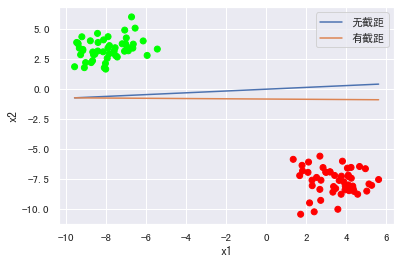

In [30]:
plt.scatter(X[:,0], X[:,1], c=np.where(y==0, "#ff0000", "#00ff00") )

my_lr = MyLogisticRegression()
# 没截距
my_lr.fit(X, y, fit_intercept=False, c=0.000001, debug_cost=False)
intercept_, coef_ = my_lr.intercept_, my_lr.coef_

x = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )

# 有截距
my_lr.fit(X, y, fit_intercept=True, c=0.000001, debug_cost=False)
intercept_, coef_ = my_lr.intercept_, my_lr.coef_

x = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )

plt.legend(["无截距", "有截距"])
plt.xlabel("x1")
plt.ylabel("x2")

Text(0, 0.5, 'x2')

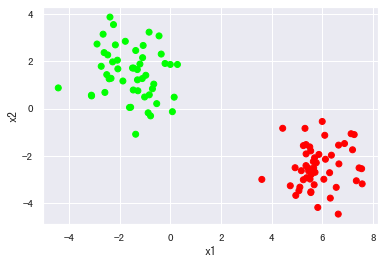

In [31]:
# 默认生成的数据似乎与原点对称，修改参数，默认center_box=(-10.0, 10.0)控制数据范围
X1, y1 = datasets.make_blobs(n_samples=100, n_features=2, centers=2, center_box=(-4.0, 8.0))

plt.scatter(X1[:,0], X1[:,1], c=np.where(y1==0, "#ff0000", "#00ff00") )
plt.xlabel("x1")
plt.ylabel("x2")

逻辑回归手写代码有可能由于log函数计算的时候报这个`divide by zero encountered in log`，以后看看怎么修改避免。

cost:0.0492
score:0.9800
0 [-1.03813091  1.62972862]
cost:0.0001
score:1.0000
6.267557542929794 [-3.00548261  1.9513664 ]


Text(0, 0.5, 'x2')

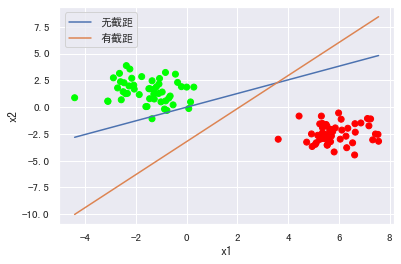

In [32]:
plt.scatter(X1[:,0], X1[:,1], c=np.where(y1==0, "#ff0000", "#00ff00") )

x = np.linspace(X1[:,0].min(), X1[:,0].max(), 1000)

my_lr = MyLogisticRegression()
# 没截距
my_lr.fit(X1, y1, fit_intercept=False, c=0.000001, debug_cost=False)
intercept_, coef_ = my_lr.intercept_, my_lr.coef_
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )
print("score:%.4f" % my_lr.score(X1, y1))
print(intercept_, coef_)

# 有截距
my_lr.fit(X1, y1, fit_intercept=True, alpha=0.3 ,c=0.1e-8, max_iters=1000000,debug_cost=0)
intercept_, coef_ = my_lr.intercept_, my_lr.coef_
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )
print("score:%.4f" % my_lr.score(X1, y1))
print(intercept_, coef_)

plt.legend(["无截距", "有截距"])
plt.xlabel("x1")
plt.ylabel("x2")

## 使用sklearn

In [33]:
from sklearn.linear_model import LogisticRegression

score:0.9900
0.0 [-1.6945034   1.18409486]
score:1.0000
3.3673339374412943 [-1.33230419  0.6421246 ]


Text(0, 0.5, 'x2')

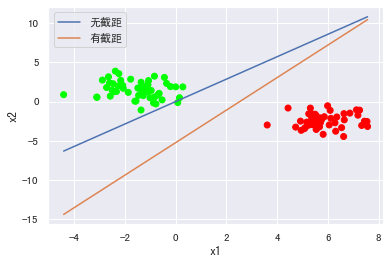

In [34]:
plt.scatter(X1[:,0], X1[:,1], c=np.where(y1==0, "#ff0000", "#00ff00") )

x = np.linspace(X1[:,0].min(), X1[:,0].max(), 1000)

lr = LogisticRegression(fit_intercept=False)
# 没截距
lr.fit(X1, y1)
intercept_, coef_ = lr.intercept_[0], lr.coef_[0]
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )
print("score:%.4f" % lr.score(X1, y1))
print(intercept_, coef_)

# 有截距
lr = LogisticRegression(fit_intercept=True)
lr.fit(X1, y1)
intercept_, coef_ = lr.intercept_[0], lr.coef_[0]
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )
print("score:%.4f" % lr.score(X1, y1))
print(intercept_, coef_)

plt.legend(["无截距", "有截距"])
plt.xlabel("x1")
plt.ylabel("x2")

score:1.0000
0.0 [-0.60735916  0.65154029]
score:1.0000
-0.20734724830419937 [-0.63188824  0.62672428]


Text(0, 0.5, 'x2')

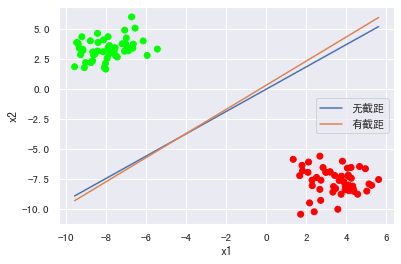

In [35]:
plt.scatter(X[:,0], X[:,1], c=np.where(y==0, "#ff0000", "#00ff00") )

x = np.linspace(X[:,0].min(), X[:,0].max(), 1000)

lr = LogisticRegression(fit_intercept=False)
# 没截距
lr.fit(X, y)
intercept_, coef_ = lr.intercept_[0], lr.coef_[0]
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )
print("score:%.4f" % lr.score(X, y))
print(intercept_, coef_)

# 有截距
lr = LogisticRegression(fit_intercept=True)
lr.fit(X, y)
intercept_, coef_ = lr.intercept_[0], lr.coef_[0]
plt.plot(x, -(coef_[0]*x + intercept_)/coef_[1] )
print("score:%.4f" % lr.score(X, y))
print(intercept_, coef_)

plt.legend(["无截距", "有截距"])
plt.xlabel("x1")
plt.ylabel("x2")

In [36]:
0.1e-3

0.0001

In [37]:
0.1e-30 == 0.1e-31

False